In [5]:
#Exercise on linear models

import plotly.express as px # python -m pip install plotly
import seaborn as sns # python -m pip install seaborn
import numpy as np
import matplotlib.pyplot as plt

data = px.data.gapminder().query("continent=='Europe'")
data = data[['country','year','lifeExp','pop','gdpPercap']]
data.head()

,country,year,lifeExp,pop,gdpPercap
12,Albania,1952,55.23,1282697,1601.056136
13,Albania,1957,59.28,1476505,1942.284244
14,Albania,1962,64.82,1728137,2312.888958
15,Albania,1967,66.22,1984060,2760.196931
16,Albania,1972,67.69,2263554,3313.422188


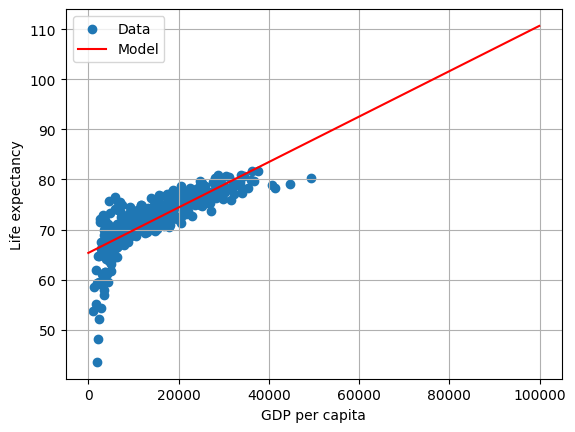

R^2 value is 0.609622267226523


In [6]:
#Simple linear regression between life expectancy and GDP per capita

coefs = np.polyfit(data['gdpPercap'],data['lifeExp'],1)

gdp = np.arange(0,100000,100) #define range for possible values of GDP
life_model = gdp*coefs[0] + coefs[1]

plt.scatter(data['gdpPercap'],data['lifeExp'])
plt.plot(gdp,life_model,'r')
plt.legend(['Data','Model'])
plt.ylabel('Life expectancy')
plt.xlabel('GDP per capita')
plt.grid()
plt.show()

life_model_R = data['gdpPercap']*coefs[0] + coefs[1]
# Estimate the goodnes of the fit by R-square
SS_r = ((life_model_R - data['lifeExp'])**2).sum()  #Residual sum of squares
SS_tot = ((data['lifeExp'] - data['lifeExp'].mean())**2).sum()  #Variance

R2 = 1- SS_r/SS_tot
print('R^2 value is', R2) #0.6096 is somewhat poor value

Model coefficients are [ 2.40406491  1.36712506 -0.        ]


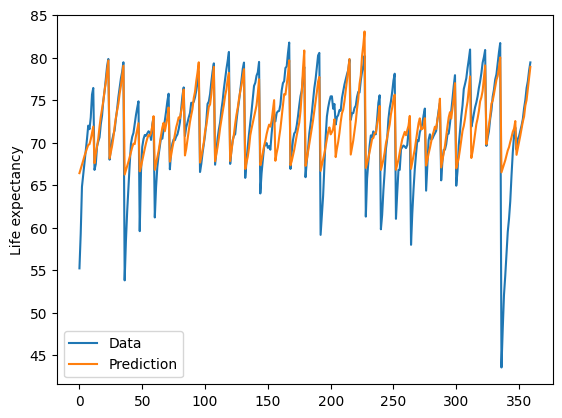

R^2 score is 0.6519637648951634


In [23]:
#Multivariable model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing


y = data['lifeExp'].values #Target
X = data[['gdpPercap','year','pop']].values #Features

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#model = LinearRegression() #Normal regression
model = Lasso() #Lasso regression
model.fit(X,y)
print('Model coefficients are', model.coef_)

#Now we can actually test the model!
prediction = model.predict(X)

#plt.plot(y_test)
plt.plot(y)
plt.plot(prediction)
plt.legend(['Data','Prediction'])
plt.ylabel('Life expectancy')
plt.show()

#print('R^2 score is', model.score(X_test,y_test))
r2 = model.score(X, y)
print('R^2 score is', r2)


In [25]:
import eli5
eli5.show_weights(model,feature_names = ['gdpPercap','year','pop'])


Weight?,Feature
+71.904,<BIAS>
+2.404,gdpPercap
+1.367,year


Model coefficients are [ 2.46114359  1.37009075 -0.        ]


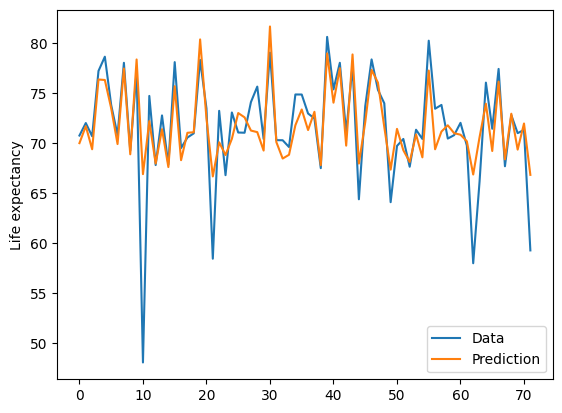

R^2 score is 0.6204719482386856


In [26]:
#Multivariable model
#Here we use the train-test approacs

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

y = data['lifeExp'].values #Target
X = data[['gdpPercap','year','pop']].values #Features

#Divide data to train and test data sets

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#model = LinearRegression() #Normal regression
model = Lasso() #Lasso regression
model.fit(X_train,y_train)
print('Model coefficients are', model.coef_)

#Now we can actually test the model!
prediction = model.predict(X_test)

plt.plot(y_test)
plt.plot(prediction)
plt.legend(['Data','Prediction'])
plt.ylabel('Life expectancy')
plt.title('Test data vs. prediction')
plt.show()

print('R^2 score is', model.score(X_test,y_test))

